## Observations and Insights 

In [697]:
# Three Observations
#Capomulin is effective in reducing the tumor volume size.
#As Average Tumor Volumes Increase, so does Mouse Weight.
#Cerftamin and Infubinol does not reduce tumor size.

In [675]:


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import mode

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse = pd.merge(mouse_metadata,study_results,on="Mouse ID")
mouse.head()
# Display the data table for preview
mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [676]:
# Checking the number of mice.
mouse["Mouse ID"].value_counts()

g989    13
b879    10
k894    10
l897    10
c264    10
        ..
b447     1
n482     1
l872     1
h428     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [677]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse = mouse.set_index("Mouse ID")
mouse.head()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [678]:
mouseclean = mouse.drop(index=["g989"])
mouseclean.index.value_counts()

v991    10
j913    10
k894    10
l897    10
c264    10
        ..
d133     1
t573     1
v199     1
b447     1
u153     1
Name: Mouse ID, Length: 248, dtype: int64

In [679]:
# Optional: Get all the data for the duplicate mouse ID. 



In [680]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [681]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [682]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mousecleanr = mouseclean.groupby(["Drug Regimen"])
mousecleanr.head()
mousemean = mousecleanr["Tumor Volume (mm3)"].mean()
mousemedian = mousecleanr["Tumor Volume (mm3)"].median()
mousevar = mouseclean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
mousesta = mouseclean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
mousesem = mouseclean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [683]:
reg = pd.DataFrame({
    "Mean" : mousemean,
    "Median" : mousemedian,
    "Variance" : mousevar,
    "Standard Deviation" : mousesta,
    "SEM" : mousesem
})
reg.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [684]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouseclean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]).rename(columns={"mean": "Mean", "median":"Median","var":"Variance","std":"Standard Deviation","sem":"SEM"}).head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [685]:
mouseclean.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


## Bar and Pie Charts

[]

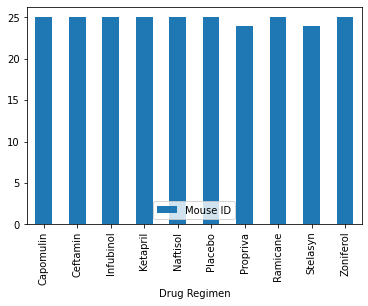

In [686]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
panbar = mouseclean.reset_index(drop=False).set_index("Drug Regimen")
num = panbar.groupby("Drug Regimen")["Mouse ID"].nunique()
num
pandbar = num.plot.bar
pandchar = pd.DataFrame(num)
pandaschart = pandchar.plot.bar()
pandaschart.plot()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

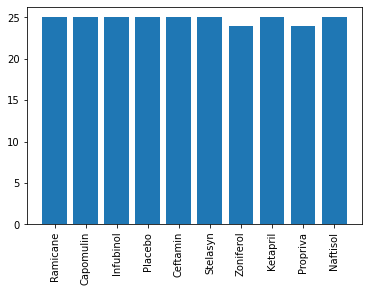

In [687]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = mouseclean["Drug Regimen"].unique()
pltchart = plt.bar(x_axis, num)
plt.xticks(rotation="vertical")

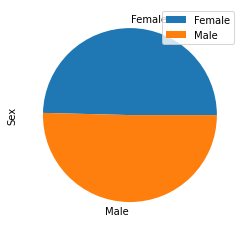

In [688]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = mouseclean.groupby("Mouse ID")["Sex"].describe()
pd.DataFrame(gender)
female = gender.loc[gender["top"]=="Female"]
femalemice = female["unique"].count()
male = gender.loc[gender["top"]=="Male"]
malemice = male["unique"].count()
totalmouse = pd.DataFrame({"Sex":[femalemice,malemice]}, index=["Female","Male"])
totalmouse
genders = totalmouse.plot.pie(y="Sex")


([<matplotlib.patches.Wedge at 0x7ff31af1f5b0>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')])

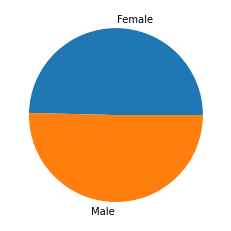

In [689]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = "Female","Male"
amounts = [femalemice,malemice]
plt.pie(amounts,labels = labels)

In [690]:
mouseclean.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


## Quartiles, Outliers and Boxplots

In [691]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouseclean.head()
capomouse = mouseclean.loc[(mouseclean["Drug Regimen"]=="Capomulin") | (mouseclean["Drug Regimen"]=="Ceftamin") | (mouseclean["Drug Regimen"]=="Ramicane") | (mouseclean["Drug Regimen"]=="Infubinol")]
capomouse.reset_index(drop=False)
# Start by getting the last (greatest) timepoint for each mouse
maxday = capomouse.groupby("Mouse ID")["Timepoint"].max()
maxdf = pd.DataFrame(maxday)
maxdf = maxdf.rename(columns = {"Timepoint":"End Timepoint"})
maxdf
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergemax = pd.merge(mouseclean,maxdf,on="Mouse ID")
mergemax
tumor = mergemax.loc[(mergemax["Timepoint"])==(mergemax["End Timepoint"])]
tumor

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,End Timepoint
Mouse ID,,,,,,,,
k403,Ramicane,Male,21,16,45,22.050126,1,45
s185,Capomulin,Female,3,17,45,23.343598,1,45
x401,Capomulin,Female,16,15,45,28.484033,0,45
m601,Capomulin,Male,22,17,45,28.430964,1,45
g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...
x822,Ceftamin,Male,3,29,45,61.386660,3,45
y163,Infubinol,Female,17,27,45,67.685569,3,45
y769,Ceftamin,Female,6,27,45,68.594745,4,45


In [692]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinal", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


quartiles = tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume is: {lowerq}")
print(f"The upper quartile of volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
outliers = tumor.loc[(tumor["Tumor Volume (mm3)"] < lower_bound) | (tomouse["Tumor Volume (mm3)"] > upper_bound)]
outliers

The lower quartile of volume is: 37.187743802499995
The upper quartile of volume is: 59.930261755000004
The interquartile range of volume is: 22.74251795250001
The the median of volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,End Timepoint
Mouse ID,,,,,,,,


<Figure size 720x720 with 0 Axes>

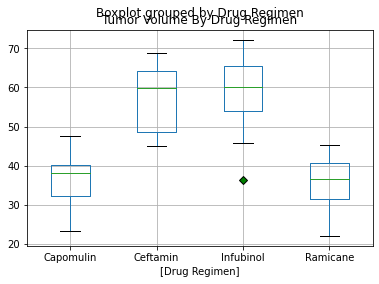

<Figure size 720x720 with 0 Axes>

In [670]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
finalchart = tumor[["Drug Regimen","Tumor Volume (mm3)"]]
green_diamond = dict(markerfacecolor='g', marker='D')
finalchart.boxplot(by="Drug Regimen",flierprops=green_diamond)

plt.title("Tumor Volume By Drug Regimen")
plt.figure(figsize = (10,10))

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

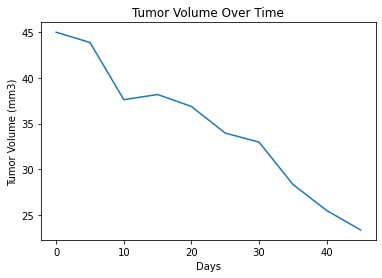

In [694]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mouseclean.reset_index(drop=False)
amouse = capomulin.loc[capomulin["Mouse ID"] == "s185"]
amouse
plt.plot(amouse["Timepoint"],amouse["Tumor Volume (mm3)"])
plt.title("Tumor Volume Over Time")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")

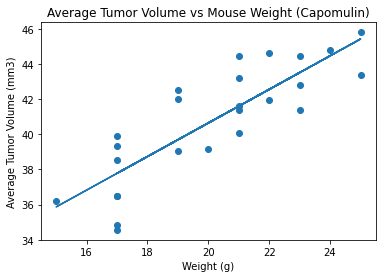

In [696]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
caposcatter = mouseclean.reset_index(drop=False)
capscatt = caposcatter.loc[caposcatter["Drug Regimen"]=="Capomulin"]
aveweight = capscatt.groupby("Mouse ID")["Weight (g)"].mean()
avevol = capscatt.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(aveweight,avevol)
slope, intercept, r_value, p_value, std_err = st.linregress(aveweight, avevol)
best_fit = slope*aveweight+intercept
plt.title("Average Tumor Volume vs Mouse Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(aveweight,best_fit)

## Correlation and Regression

In [655]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print()
print(f"The correlation coefficient is {r_value}")
print(f"The Linear Regression Model is y={slope}*x + {intercept}")

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)
The correlation coefficient is 0.8419363424694718
The Linear Regression Model is y=0.9544396890241045*x + 21.552160532685015
